## Workgroup 4: extra
#### Group: 1
#### Members:
- Juan José Tang
- Ursula Cotrina
- Victoria Olivera

In [1]:
#install.packages( "glmnet" )
#install.packages( "lmtest" )
#install.packages( "sandwich" )
#install.packages("tidyverse")
#install.packages("cli")
#install.packages("haven")
#install.packages("estimatr")
#install.packages("stargazer")
library(lmtest)
library(sandwich)
library(glmnet)

Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Loaded glmnet 4.1-1


In [2]:
library(haven)
library(tidyverse)
library(estimatr)
library(stargazer)
library(cli)


Warning message:
"package 'haven' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'broom' 0.5.2 is being loaded, but >= 0.7.6 is required


## Good and Bad Controls

In [3]:
#install.packages("dagitty")
#install.packages("lavaan")
library(dagitty)
library(lavaan)

Warning message:
"package 'dagitty' was built under R version 3.6.3"This is lavaan 0.6-11
lavaan is FREE software! Please report any bugs.


In [4]:
#install.packages("tibble")
library(tibble)

Warning message:
"package 'tibble' was built under R version 3.6.3"

### Model 1 :  Good Controls (blocking back-door paths)


In this model, the variable Z acts as a confounder of X and Y. In this regard, if we want to estimate the effects of X on Y that are not caused by changes in Z, we **must** control for Z. In this short example we introduce this reasoning in a Directed Acyclical Graph.

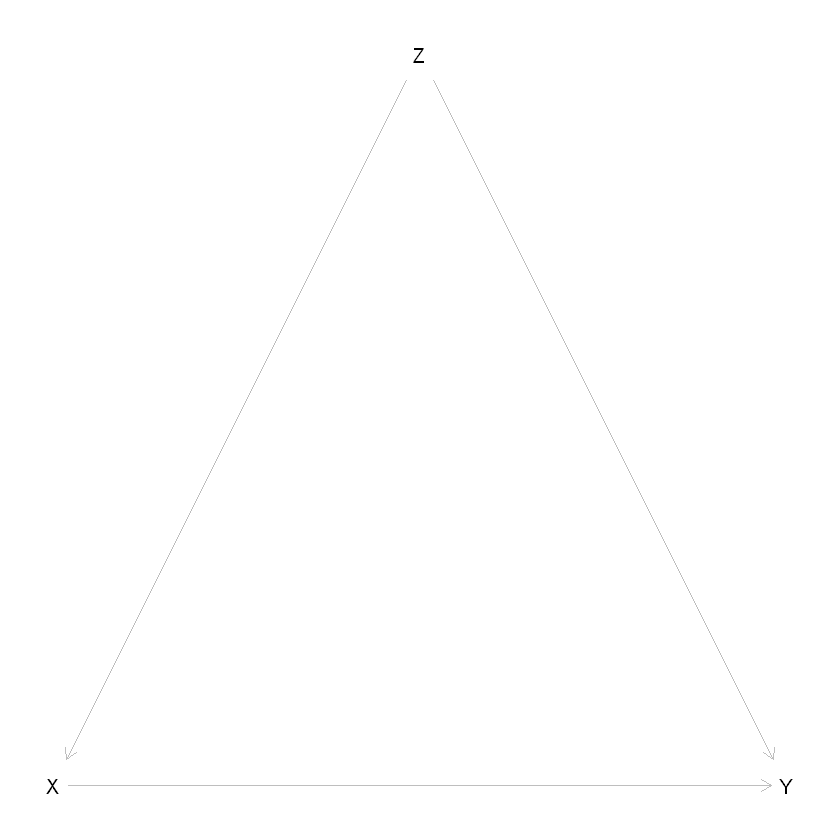

In [23]:
g <- dagitty("dag {
    X <- Z -> Y
    X -> Y
}")
coordinates(g) <- list(
    x=c(X=1,Z=1.5,Y=2),
    y=c(X=1,Z=0,Y=1) )

plot(g)


In [24]:
# Generating random numbers
set.seed(1)
n <- 1000   
Z <- rnorm(1000)
X <- 4*Z + rnorm(1000)
Y <- X + 3*Z + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z)

In [13]:
library("stargazer")

In [26]:
# Regressions
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
)


                                      Dependent variable:                  
                    -------------------------------------------------------
                                               Y                           
                             NoControl                 UsingControl        
                                (1)                         (2)            
---------------------------------------------------------------------------
X                            1.717***                    1.022***          
                              (0.009)                     (0.031)          
                                                                           
Z                                                        2.961***          
                                                          (0.130)          
                                                                           
Constant                       0.025                       0.016           
           

We can see that, although the real marginal effect of X on Y is 1, if we do not control for Z, we get a biased estimator, due to a spurious correlation.

### Model 2:  Good Controls (blocking back-door paths)


Now let's think of a similar case, but this time the *confounder* is a non-observable variable. Nevertheless, controlling for Z blocks the backdoor path from this unobservable to X, leading to a unbiased estimator for the marginal effect of X on Y.

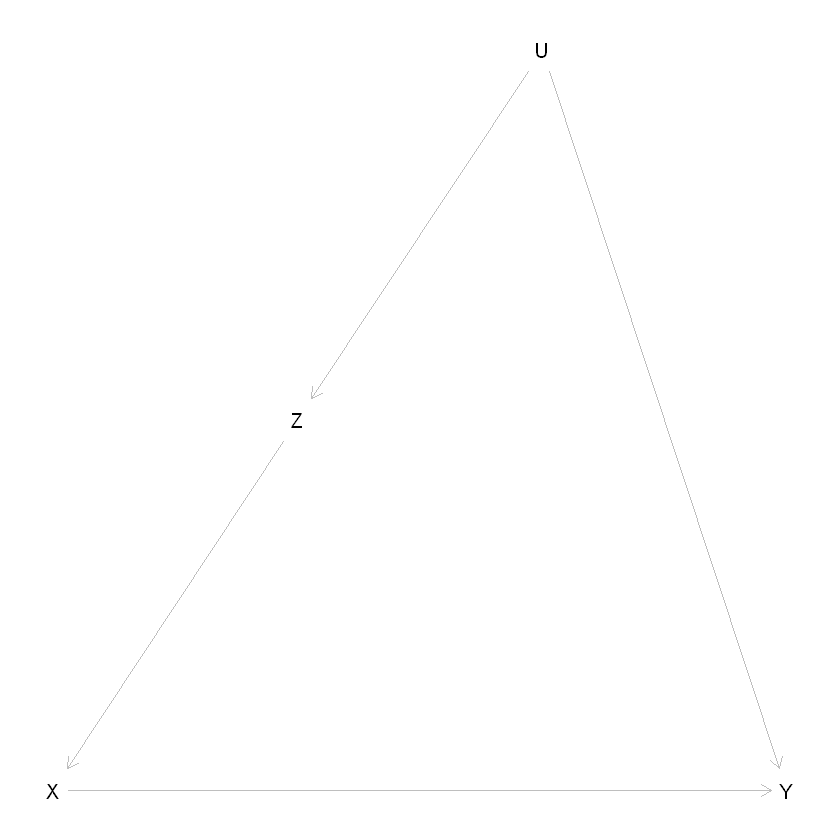

In [27]:
g <- dagitty("dag {
    X <- Z <- U -> Y
    X -> Y
}")
coordinates(g) <- list(
    x=c(X=1,Z=2,U=3,Y=4),
    y=c(X=2,Z=1,U=0,Y=2) )

plot(g)


In [28]:
set.seed(1)
n <- 1000   
U <- rnorm(1000)
Z <- 2*U + rnorm(1000)
X <- 4*Z + rnorm(1000)
Y <- X + 3*U + rnorm(1000)

# Create a dataframe
d <- tibble(X=X,Y=Y,Z=Z,U=U)

In [29]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
          )


                                      Dependent variable:                  
                    -------------------------------------------------------
                                               Y                           
                             NoControl                 UsingControl        
                                (1)                         (2)            
---------------------------------------------------------------------------
X                            1.297***                    1.012***          
                              (0.006)                     (0.053)          
                                                                           
Z                                                        1.158***          
                                                          (0.216)          
                                                                           
Constant                       0.024                       0.029           
           

We can see that, although the real marginal effect of X on Y is 1, if we do not control for Z, we get a biased estimator, due to a spurious correlation.

### Model 3:  Good Controls (blocking back-door paths)


A final example of a good control is presented in the figure below. Here, as before, we have an unobservable confounder, which affects both X and Z. In this case, although Z does not have an influence on X,controlling for Z would block the backdoor path from the unobserved to Z and Y.

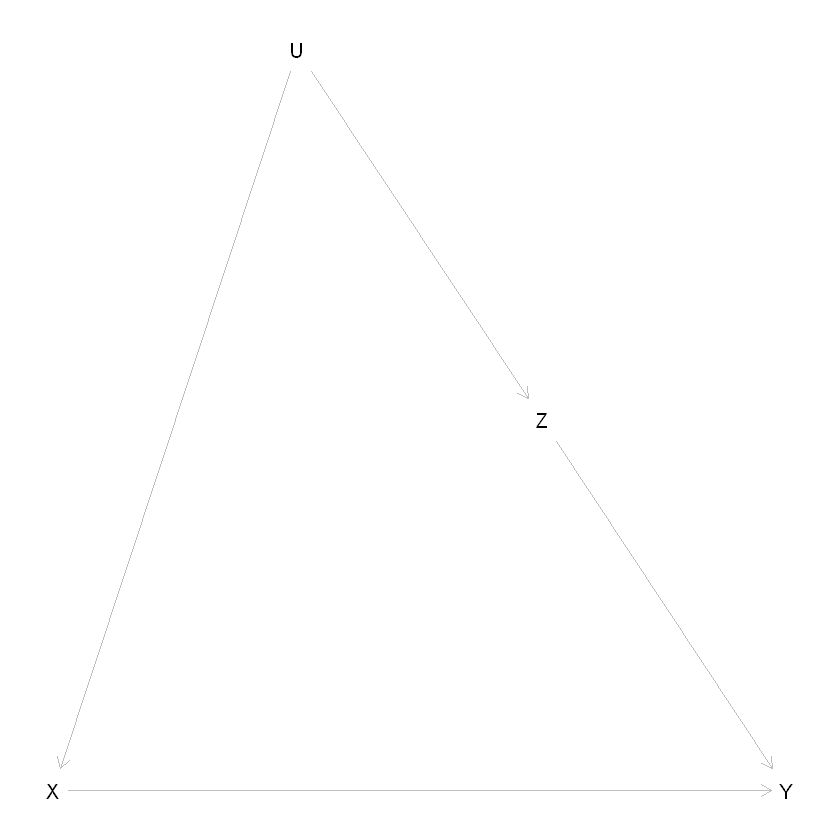

In [30]:
g <- dagitty("dag {
    X <- U -> Z -> Y 
    X -> Y
}")
coordinates(g) <- list(
    x=c(X=1,Z=3,U=2,Y=4),
    y=c(X=2,Z=1,U=0,Y=2) )

plot(g)


In [31]:
set.seed(1)
n <- 1000   
U <- rnorm(1000)
Z <- 2*U + rnorm(1000)
X <- 4*U + rnorm(1000)
Y <- X + 3*Z + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z,U=U)

In [33]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
          )


                                     Dependent variable:                  
                    ------------------------------------------------------
                                              Y                           
                            NoControl                 UsingControl        
                               (1)                         (2)            
--------------------------------------------------------------------------
X                            2.412***                   1.001***          
                             (0.026)                     (0.015)          
                                                                          
Z                                                       3.011***          
                                                         (0.029)          
                                                                          
Constant                      -0.058                      0.017           
                        

We can see that, although the real marginal effect of X on Y is 1, if we do not control for Z, we get a biased estimator, due to a spurious correlation.

### Model 4: Good Controls (blocking back-door paths)

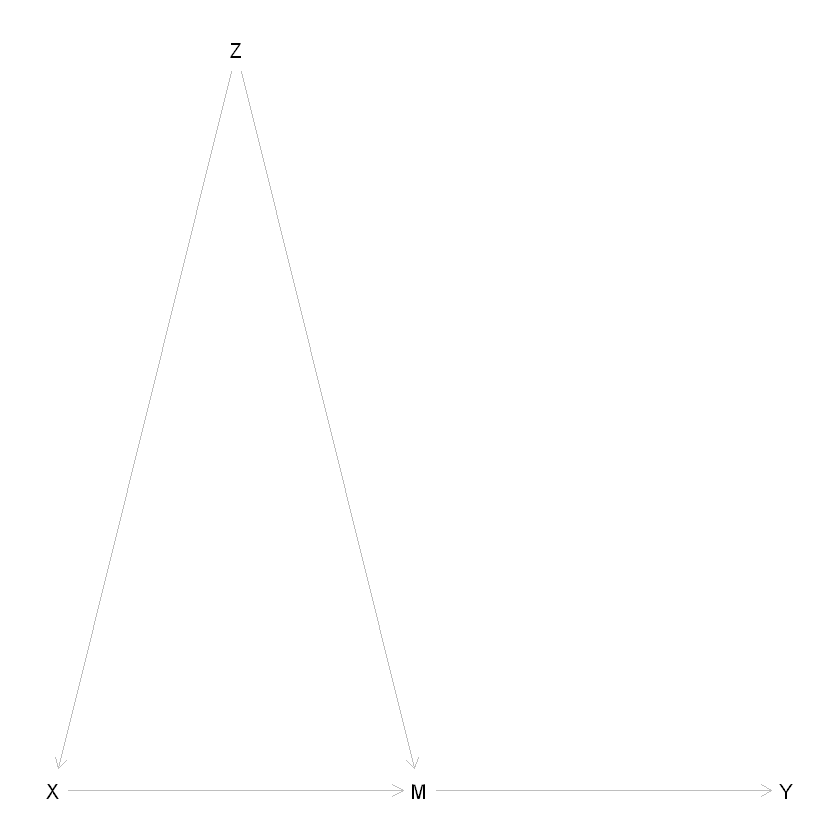

In [41]:
g <- dagitty("dag {
    X <- Z -> M -> Y 
    X -> M
}")
coordinates(g) <- list(
    x=c(X=1,Z=1.5,M=2,Y=3),
    y=c(X=1,Z=0,M=1,Y=1) )

plot(g)


In [42]:
set.seed(1)
n <- 1000   
Z <- rnorm(1000)
X <- 2*Z + rnorm(1000)
M <- X + 8*Z + rnorm(1000)
Y <- M + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z,M=M)

In [45]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
lm_3 <- lm(Y ~ X + Z + M, d) #Threats of confounding
stargazer(lm_1, lm_2, lm_3,
          type = "text", 
          column.labels = c("NoControl", "UsingControl", "ThreatsConfounding")
          )


                                                   Dependent variable:                                
                    ----------------------------------------------------------------------------------
                                                            Y                                         
                            NoControl                 UsingControl             ThreatsConfounding     
                               (1)                         (2)                         (3)            
------------------------------------------------------------------------------------------------------
X                            4.224***                   1.037***                      0.006           
                             (0.054)                     (0.045)                     (0.045)          
                                                                                                      
Z                                                       7.998***        

### Model 5: Good Controls (blocking back-door paths)

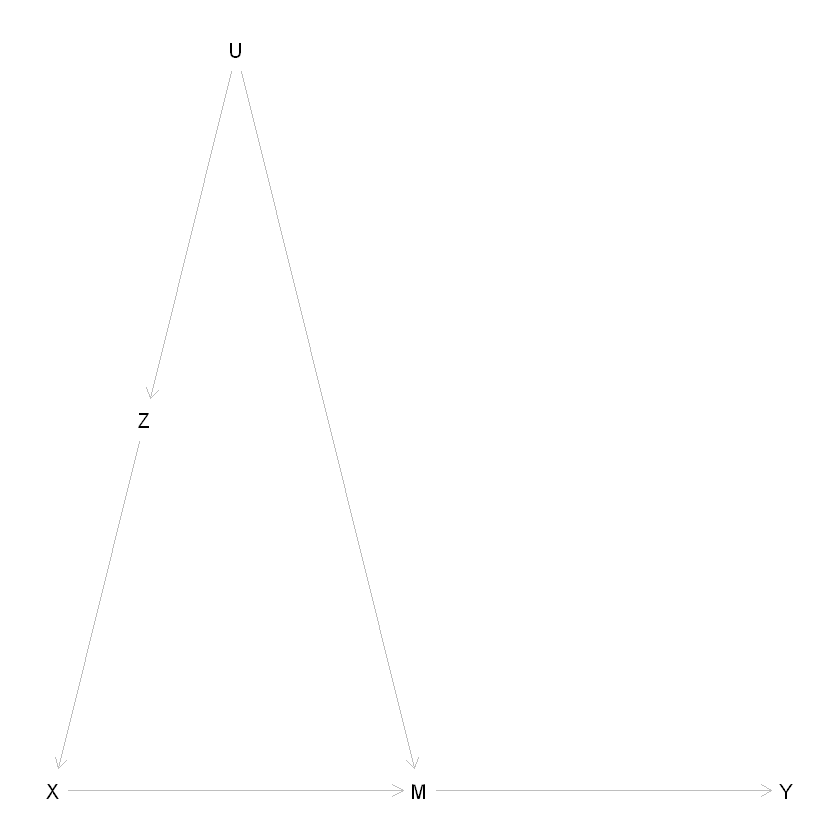

In [47]:
g <- dagitty("dag {
    Z <- U -> M -> Y 
    Z -> X -> M
}")
coordinates(g) <- list(
    x=c(X=1,Z=1.25,U=1.5,M=2,Y=3),
    y=c(X=1,Z=0.5,U=0,M=1,Y=1) )

plot(g)

In [48]:
set.seed(1)
n <- 1000  
U <- rnorm(1000)
Z <- 3*U + rnorm(1000)
X <- 2*Z + rnorm(1000)
M <- X + 5*U + rnorm(1000)
Y <- M + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z,M=M, U=U)

In [49]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
lm_3 <- lm(Y ~ X + Z + M, d) #Threats of confounding
stargazer(lm_1, lm_2, lm_3,
          type = "text", 
          column.labels = c("NoControl", "UsingControl", "ThreatsConfounding")
          )


                                                    Dependent variable:                                
                    -----------------------------------------------------------------------------------
                                                             Y                                         
                             NoControl                 UsingControl             ThreatsConfounding     
                                (1)                         (2)                         (3)            
-------------------------------------------------------------------------------------------------------
X                            1.722***                    0.930***                     -0.062*          
                              (0.011)                     (0.066)                     (0.034)          
                                                                                                       
Z                                                        1.635*

### Model 6: Good Controls (blocking back-door paths)

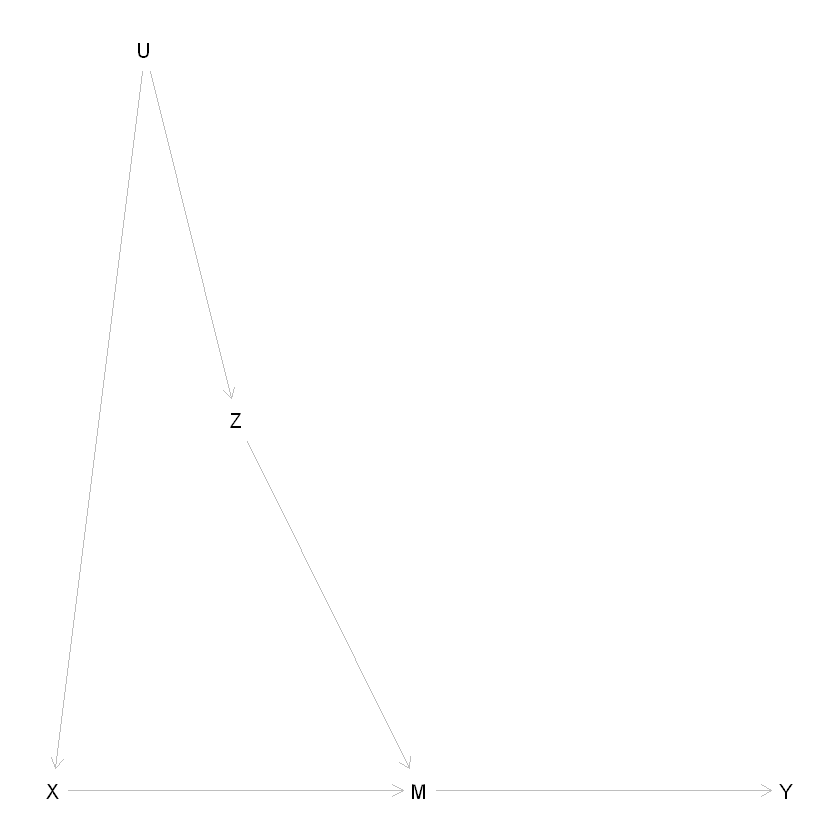

In [50]:
g <- dagitty("dag {
    X <- U -> Z -> M -> Y
    X -> M
}")
coordinates(g) <- list(
    x=c(X=1,Z=1.5,U=1.25,M=2,Y=3),
    y=c(X=1,Z=0.5,U=0,M=1,Y=1) )

plot(g)

In [51]:
set.seed(1)
n <- 1000  
U <- rnorm(1000)
Z <- 4*U + rnorm(1000)
X <- 2*U + rnorm(1000)
M <- X + Z + rnorm(1000)
Y <- M + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z,M=M, U=U)

In [52]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
lm_3 <- lm(Y ~ X + Z + M, d) #Threats of confounding
stargazer(lm_1, lm_2, lm_3,
          type = "text", 
          column.labels = c("NoControl", "UsingControl", "ThreatsConfounding")
          )


                                                   Dependent variable:                               
                    ---------------------------------------------------------------------------------
                                                            Y                                        
                            NoControl                 UsingControl            ThreatsConfounding     
                               (1)                        (2)                         (3)            
-----------------------------------------------------------------------------------------------------
X                            2.570***                   0.939***                    -0.067*          
                             (0.034)                    (0.040)                     (0.041)          
                                                                                                     
Z                                                       1.028***                 

Relying the last three models, when thinking about possible threats of confounding, modelers need to keep in mind
that common causes of X and any mediator (between X and Y ) also confound the effect of X on Y . Therefore, Models 4, 5 and 6 are analogous to Models 1, 2 and 3 and controlling for
Z blocks the back-door path from X to Y and produces an unbiased estimation.

### Model 7:  Bad Control (M-bias)

Now consider the following DAC. We should observe that Z is correlated with X,Y , as it shares common unobservable confounders. Besides, Z is a pre-treatment variable. Nevertheless, including Z in the regression of X on Y would induce bias by opening the backdoor path $ X \leftarrow U1 \rightarrow Z \leftarrow U2 \rightarrow Y$ 

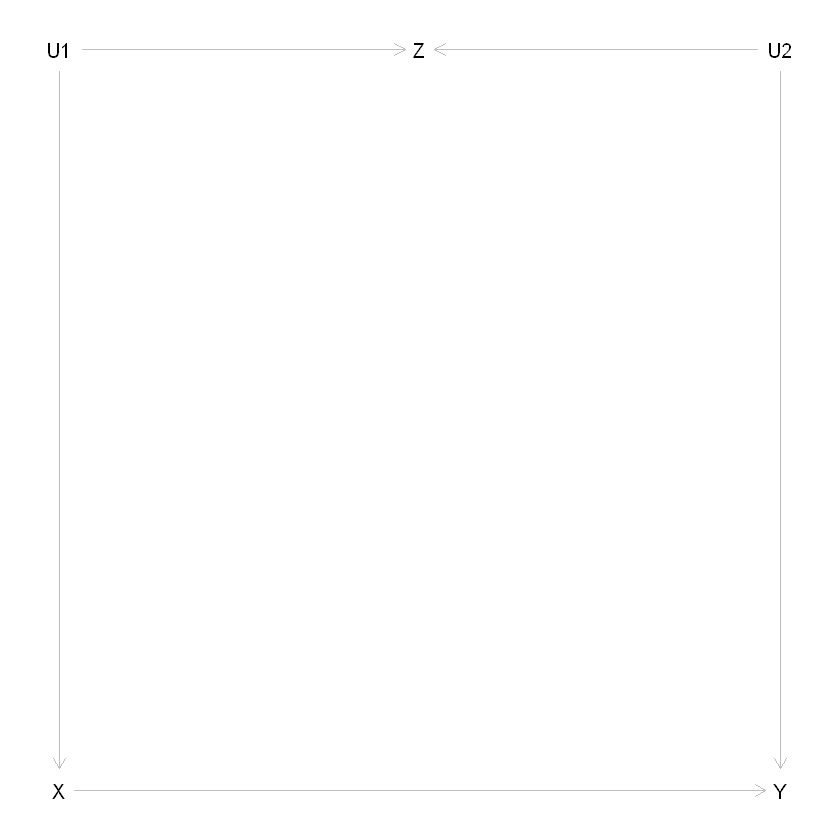

In [53]:
g <- dagitty("dag {
    X <- U1 -> Z <- U2 -> Y
    X -> Y
}")
coordinates(g) <- list(
    x=c(X=1,U1=1,Z=2,U2=3,Y=3),
    y=c(X=1,U1=0,Z=0,U2=0,Y=1) )

plot(g)

In [54]:
set.seed(1)
n <- 1000  
U1 <- rnorm(1000)
U2 <- rnorm(1000)
Z <- 0.5*U1 + 0.3*U2 + rnorm(1000)
X <- 2*U1 + rnorm(1000)
Y <- X + 7*U2 + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z,U1=U1, U2=U2)

In [55]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
          )


                                   Dependent variable:               
                    -------------------------------------------------
                                            Y                        
                           NoControl               UsingControl      
                              (1)                      (2)           
---------------------------------------------------------------------
X                           1.025***                 0.604***        
                            (0.100)                  (0.105)         
                                                                     
Z                                                    1.904***        
                                                     (0.201)         
                                                                     
Constant                     -0.134                   -0.145         
                            (0.233)                  (0.223)         
                   

### Variation of Model 7

Similarly, now consider the following DAC. We should observe that Z is correlated with X,Y , as it shares common unobservable confounders. Besides, Z is a pre-treatment variable, and now has a direct effect on Y. While including Z in the regression of X on Y now closes the backdoor path formed by $ X\leftarrow U1 \rightarrow Z \rightarrow Y$, it opens the other backdoor path formed by $ X \leftarrow U1 \rightarrow Z \leftarrow U2 \rightarrow Y$ . In neither case we would get a unbiased estimator.

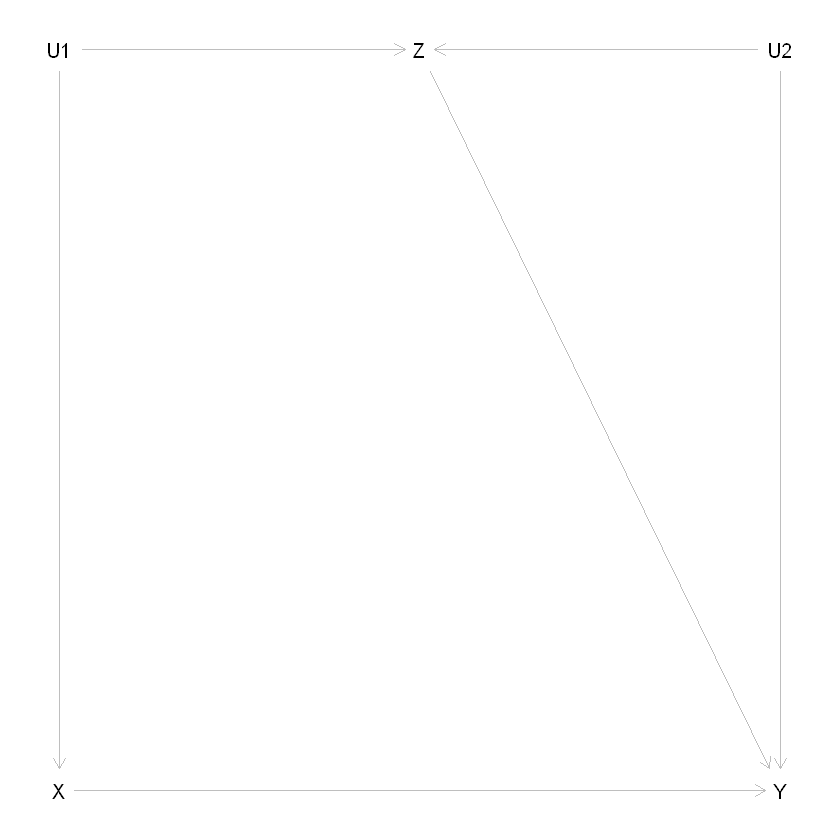

In [56]:
g <- dagitty("dag {
    X <- U1 -> Z <- U2 -> Y
    X -> Y
    Z -> Y
}")
coordinates(g) <- list(
    x=c(X=1,U1=1,Z=2,U2=3,Y=3),
    y=c(X=1,U1=0,Z=0,U2=0,Y=1) )

plot(g)

In [57]:
set.seed(1)
n <- 1000  
U1 <- rnorm(1000)
U2 <- rnorm(1000)
Z <- 0.5*U1 + 0.3*U2 + rnorm(1000)
X <- 2*U1 + rnorm(1000)
Y <- X + Z + 7*U2 + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z,U1=U1, U2=U2)

In [58]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
          )


                                   Dependent variable:               
                    -------------------------------------------------
                                            Y                        
                           NoControl               UsingControl      
                              (1)                      (2)           
---------------------------------------------------------------------
X                           1.247***                 0.604***        
                            (0.105)                  (0.105)         
                                                                     
Z                                                    2.904***        
                                                     (0.201)         
                                                                     
Constant                     -0.128                   -0.145         
                            (0.245)                  (0.223)         
                   

### Model 8: Neutral Control (possibly good for precision)

Here, Z is not a confounder nor a collider. Hence, if we want to estimate the marginal effect of X on Y using a regression of the form "Y ~ X", our estimator would be unbiased. However, studies show (Hahn 2004, White and Lu 2011, Henckel et al. 2019) that including Z helps to improve the precision of the ACE estimator (reduce variance).

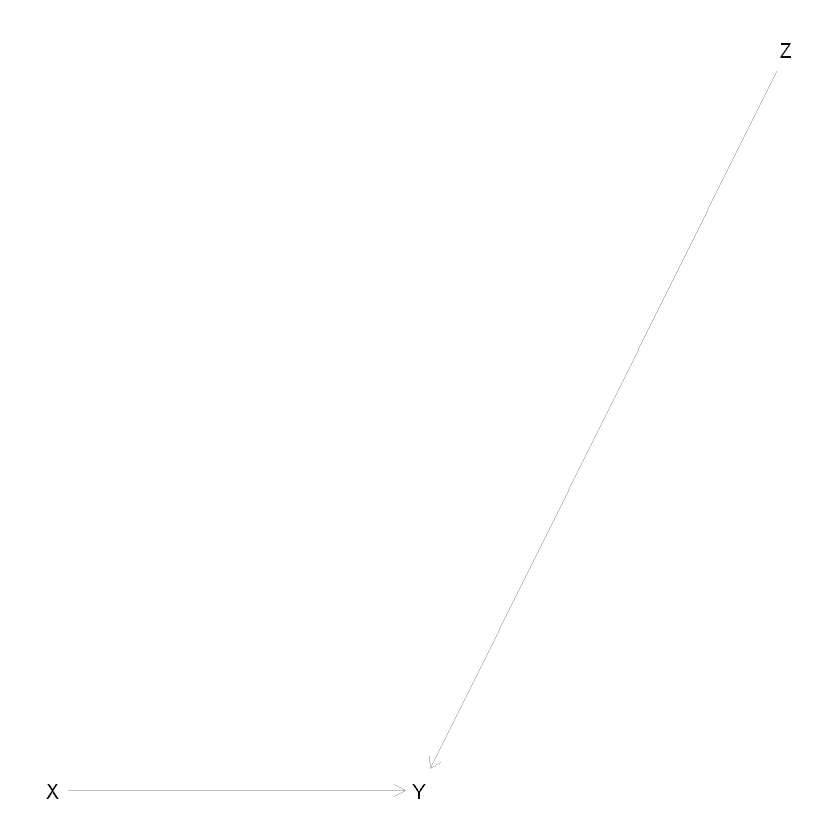

In [59]:
g <- dagitty("dag {
    X -> Y <-Z
}")
coordinates(g) <- list(
    x=c(X=1,Y=2,Z=3),
    y=c(X=1,Y=1,Z=0) )

plot(g)

In [60]:
set.seed(1)
n <- 1000  
Z <- rnorm(1000)
X <- rnorm(1000)
Y <- X + 7*Z + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z)

In [61]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
          )


                                    Dependent variable:                
                    ---------------------------------------------------
                                             Y                         
                           NoControl               UsingControl        
                              (1)                       (2)            
-----------------------------------------------------------------------
X                          1.067***                  1.022***          
                            (0.224)                   (0.031)          
                                                                       
Z                                                    7.049***          
                                                      (0.032)          
                                                                       
Constant                    -0.065                     0.016           
                            (0.233)                   (0.033)  

### Model 9: Neutral Control (possibly bad for precision)


As in model 8, Z is a neutral control, in the sense that including it or not does not affect the bias/unbiasedness of the marginal effect of X. However, controlling for Z will indeed reduce precision in the estimation of this parameter.

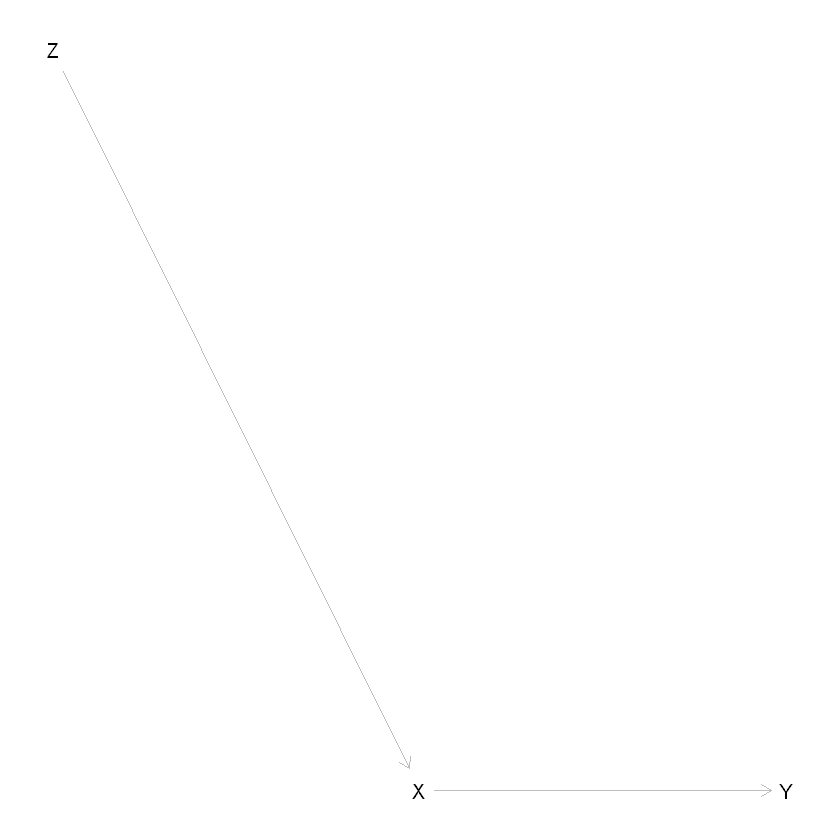

In [62]:
g <- dagitty("dag {
    Z -> X -> Y
}")
coordinates(g) <- list(
    x=c(X=2,Y=3,Z=1),
    y=c(X=1,Y=1,Z=0) )

plot(g)

In [63]:
set.seed(1)
n <- 1000  
Z <- rnorm(1000)
X <- 4.5*Z + rnorm(1000)
Y <- X + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z)

In [64]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
          )


                                      Dependent variable:                  
                    -------------------------------------------------------
                                               Y                           
                             NoControl                 UsingControl        
                                (1)                         (2)            
---------------------------------------------------------------------------
X                            1.011***                    1.022***          
                              (0.007)                     (0.031)          
                                                                           
Z                                                         -0.050           
                                                          (0.145)          
                                                                           
Constant                       0.016                       0.016           
           

### Model 10: Bad Control (bias amplification)

In this model, although Z is a pre-treatment variable, controlling for it would confound the effect of X on Y, due to the phenomenon called "bias amplification".

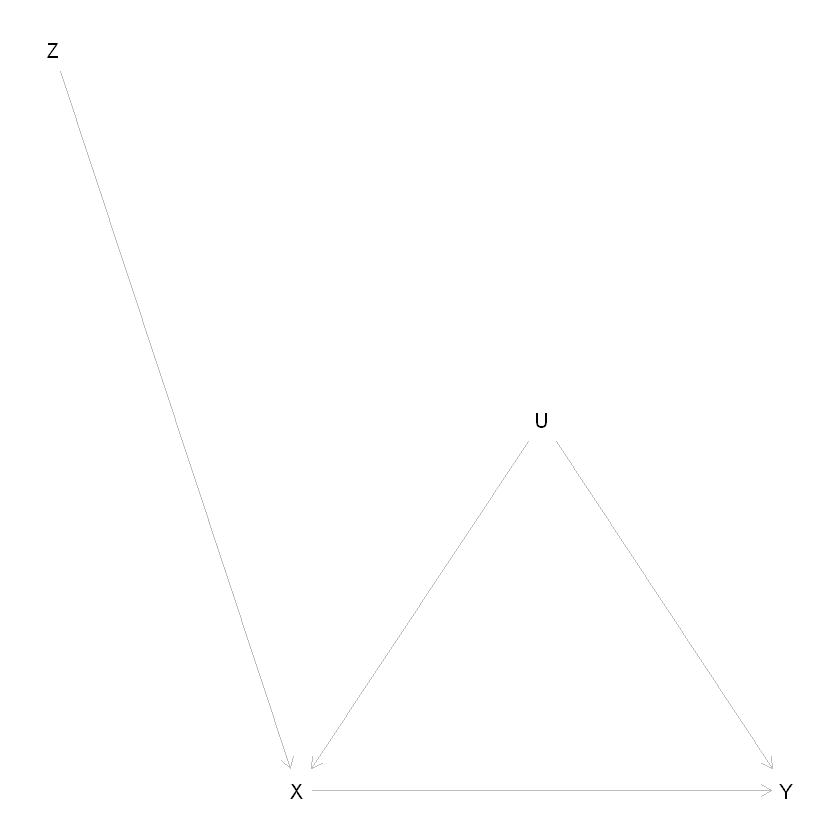

In [68]:
g <- dagitty("dag {
    Z -> X <- U -> Y
    X -> Y
}")
coordinates(g) <- list(
    x=c(Z=0.5,X=1,U=1.5,Y=2),
    y=c(Z=0,X=1,U=0.5,Y=1) )

plot(g)

In [69]:
set.seed(1)
n <- 1000  
Z <- rnorm(1000)
U <- rnorm(1000)
X <- 4.5*Z + 6*U + rnorm(1000)
Y <- X + 3*U + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z, U=U)

In [70]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
          )


                                      Dependent variable:                  
                    -------------------------------------------------------
                                               Y                           
                             NoControl                 UsingControl        
                                (1)                         (2)            
---------------------------------------------------------------------------
X                            1.316***                    1.488***          
                              (0.009)                     (0.006)          
                                                                           
Z                                                        -2.195***         
                                                          (0.044)          
                                                                           
Constant                       0.011                       0.008           
           

We can notice that Model II amplifies the existing bias, produced because we are lefting open the backdoor path $X \leftarrow U \rightarrow Y$.

### Model 11: Bad Control (overcontrol vias)

This model looks similar to model 9, the difference being on that here Z is **affected by** X, and not viceversa. Hence, to estimate the effect of X on Y, it won't be neccesary to include Z. In fact, conditioning on Z will block the effect we want to estimate.

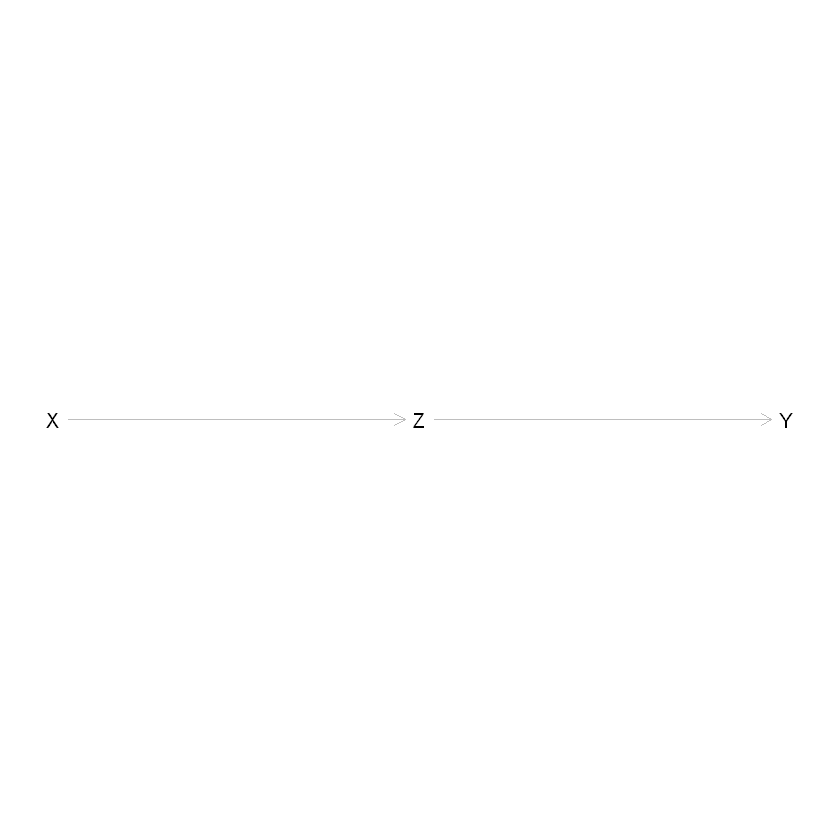

In [71]:
g <- dagitty("dag {
    X -> Z -> Y 
}")
coordinates(g) <- list(
    x=c(X=1,Z=2,Y=3),
    y=c(X=0,Z=0,Y=0) )

plot(g)

In [72]:
set.seed(1)
n <- 1000  
X <- rnorm(1000)
Z <- X + rnorm(1000)
Y <- Z + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z)

In [73]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
          )


                                    Dependent variable:                
                    ---------------------------------------------------
                                             Y                         
                           NoControl                UsingControl       
                              (1)                       (2)            
-----------------------------------------------------------------------
X                           1.056***                   0.027           
                            (0.045)                   (0.045)          
                                                                       
Z                                                     1.022***         
                                                      (0.031)          
                                                                       
Constant                    -0.0003                    0.016           
                            (0.047)                   (0.033)  

Including the mediator Z on the regression would not only be unnecessary, but will also bias the causal effect of X on Y.

### Model 12: Bad Controls (overcontrolbias)

Similar to model 11, although Z is not a mediator between X and Y, controlling for it is equivalent to partially controlling for M, hence incurring in the "overcontrol bias".

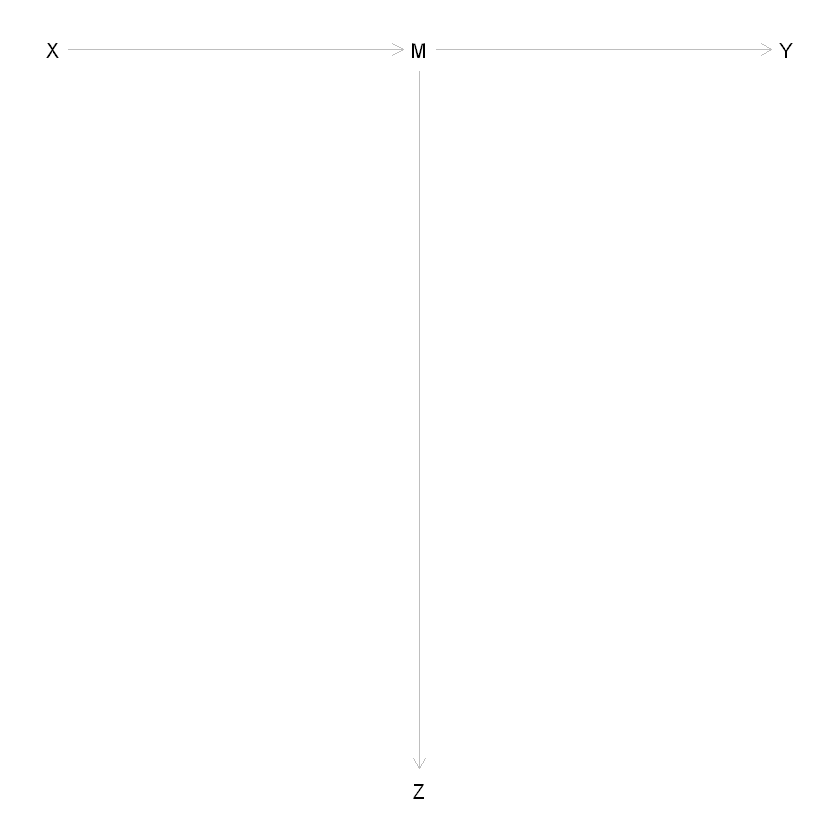

In [75]:
g <- dagitty("dag {
    X -> M -> Y 
    M -> Z
}")
coordinates(g) <- list(
    x=c(X=1,Z=2,Y=3, M=2),
    y=c(X=0,Z=0.5,Y=0, M=0) )

plot(g)

In [76]:
set.seed(1)
n <- 1000  
X <- rnorm(1000)
M <- X + rnorm(1000)
Z <- 5*M + rnorm(1000)
Y <- M + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z, M=M)

In [77]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
          )


                                   Dependent variable:               
                    -------------------------------------------------
                                            Y                        
                           NoControl               UsingControl      
                              (1)                      (2)           
---------------------------------------------------------------------
X                           1.030***                  0.039          
                            (0.045)                  (0.045)         
                                                                     
Z                                                    0.195***        
                                                     (0.006)         
                                                                     
Constant                     0.001                    0.013          
                            (0.047)                  (0.033)         
                   

Including Z will bias our estimation of the effect of X on Y due to the overcontrol bias.

### Variation of Model 11: Total vs direct effects

Consider a variation of Model 11 with an unobserved confounder of Z and Y , denoted by U.

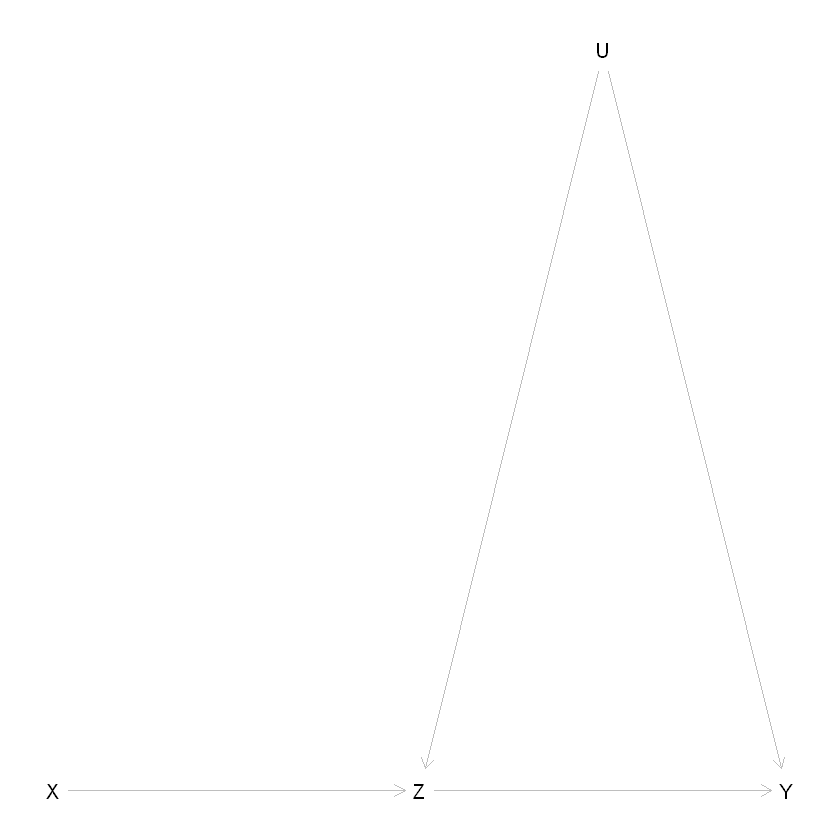

In [78]:
g <- dagitty("dag {
    X -> Z <- U -> Y 
    Z -> Y
}")
coordinates(g) <- list(
    x=c(X=1,Z=2,U=2.5,Y=3),
    y=c(X=1,Z=1,U=0,Y=1) )

plot(g)

In [80]:
set.seed(1)
n <- 1000  
X <- rnorm(1000)
U <- rnorm(1000)
Z <- X + 4*U + rnorm(1000)
Y <- Z + 3*U + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z,U=U)

In [81]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
          )


                                    Dependent variable:                
                    ---------------------------------------------------
                                             Y                         
                           NoControl               UsingControl        
                              (1)                       (2)            
-----------------------------------------------------------------------
X                          1.118***                  -0.718***         
                            (0.228)                   (0.040)          
                                                                       
Z                                                    1.707***          
                                                      (0.009)          
                                                                       
Constant                    -0.080                     0.003           
                            (0.236)                   (0.040)  

First notice that U does not confound the effect of X on Y , and thus our ACE estimate remains unbiased as it were in Model 11, so long as we do not adjust for Z. On the other hand, here adjusting for Z now opens the colliding path X → Z ← U → Y , thus biasing the CDE estimate.

### Model 13: Neutral Control (possibly good for precision)


Model 13 might seem similar to Model 12, and one may think that adjusting for Z would bias the effect estimate, by restricting variations of the mediator M. However, the key difference here is that Z is a cause, not an effect, of the mediator (and, consequently, also a cause of Y ).

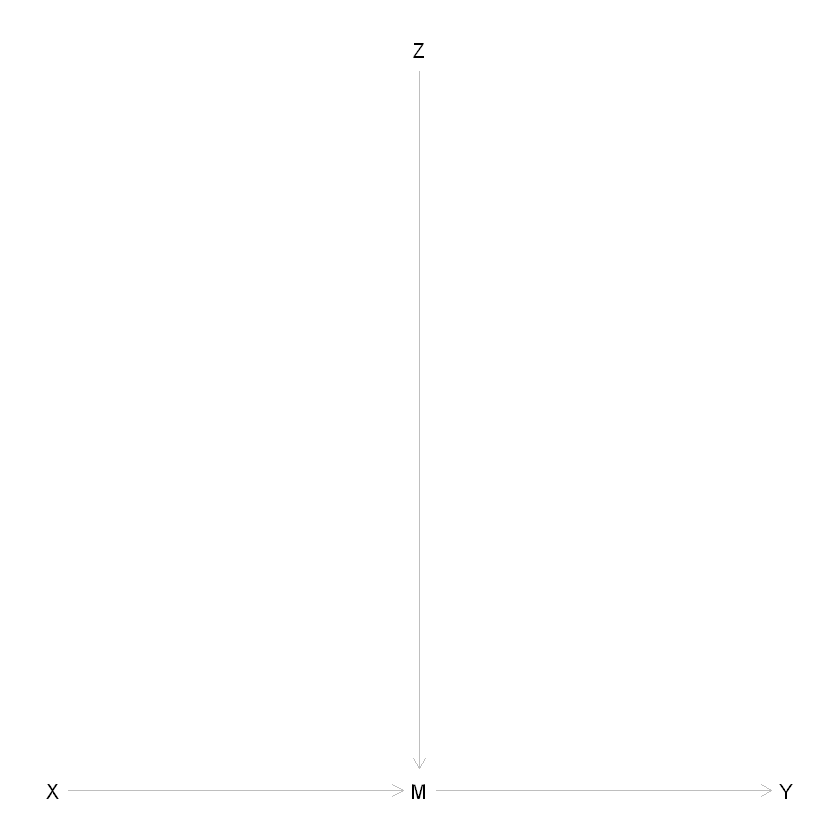

In [82]:
g <- dagitty("dag {
    X -> M -> Y
    Z -> M
}")
coordinates(g) <- list(
    x=c(X=1,M=2,Y=3,Z=2),
    y=c(X=1,M=1,Y=1,Z=0) )

plot(g)

In [83]:
set.seed(1)
n <- 1000  
Z <- rnorm(1000)
X <- rnorm(1000)
M <- X + 4*Z + rnorm(1000)
Y <- M + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z,M=M)

In [84]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
          )


                                   Dependent variable:                
                    --------------------------------------------------
                                            Y                         
                           NoControl               UsingControl       
                              (1)                      (2)            
----------------------------------------------------------------------
X                          1.063***                  1.037***         
                            (0.136)                  (0.045)          
                                                                      
Z                                                    4.073***         
                                                     (0.045)          
                                                                      
Constant                    -0.014                    0.033           
                            (0.141)                  (0.047)          
     

Model 13 is analogous to Model 8, and so controlling for Z will be neutral in terms of bias and may increase the precision of the estimation.

### Model 14: Neutral Controls (possibly helpful in the case of selection bias)

* Contrary to folklore, not all “post-treatment” variables are inherently bad controls. In Model 14  controlling for Z does not open any confounding paths between X and Y. Thus, Z is neutral in terms of bias.
* Controlling for Z does reduce the variation of the treatment variable X and so may hurt the precision of the ACE estimate in finite samples.

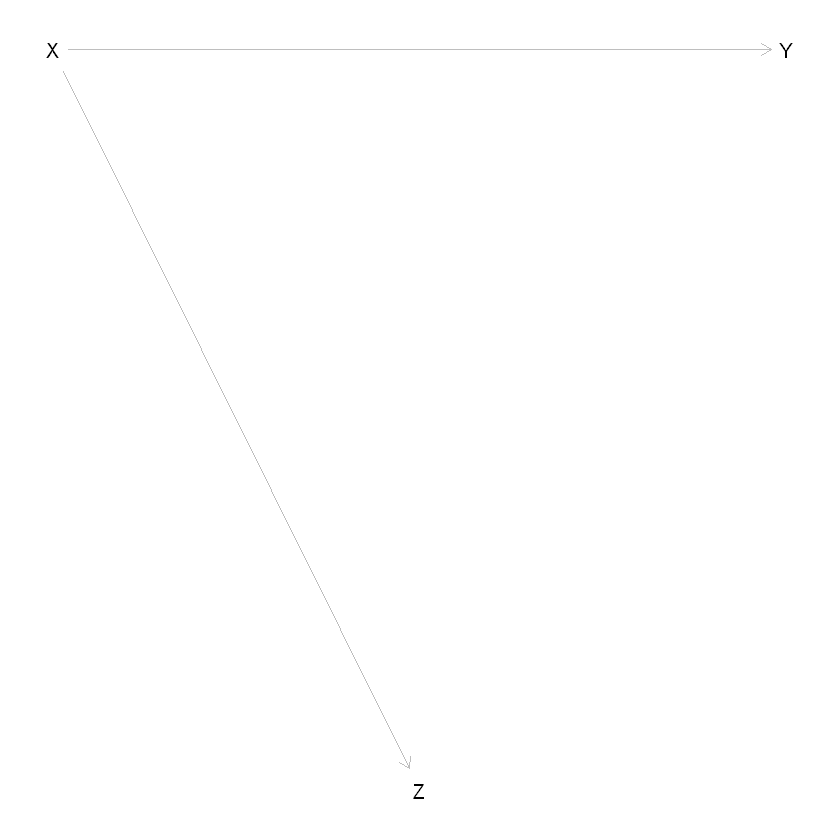

In [91]:
g <- dagitty("dag {
    Z <- X -> Y
}")
coordinates(g) <- list(
    x=c(X=1,Z=2,Y=3),
    y=c(X=0,Z=1,Y=0) )

plot(g)

In [92]:
set.seed(1)
n <- 1000  
X <- rnorm(1000)
Z <- 2*X + rnorm(1000)
Y <- X + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z)

In [93]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
          )


                                    Dependent variable:                
                    ---------------------------------------------------
                                             Y                         
                            NoControl                UsingControl      
                               (1)                       (2)           
-----------------------------------------------------------------------
X                            1.049***                  1.005***        
                             (0.031)                   (0.070)         
                                                                       
Z                                                       0.022          
                                                       (0.031)         
                                                                       
Constant                      0.016                     0.016          
                             (0.033)                   (0.033) 

In this case, controlling for Z reduce the variation of X, but doesn't reduce precision in the estimation of the causal effect of X on Y.

### Model 15: Neutral Controls (possibly helpful in the case of selection bias)


Now consider a variation of Model 14. In this case, Z is still nor a collider or confounder of X on Y, hence being neutral on bias. However, we have a colliding path on W, and by controlling for Z we can block it.

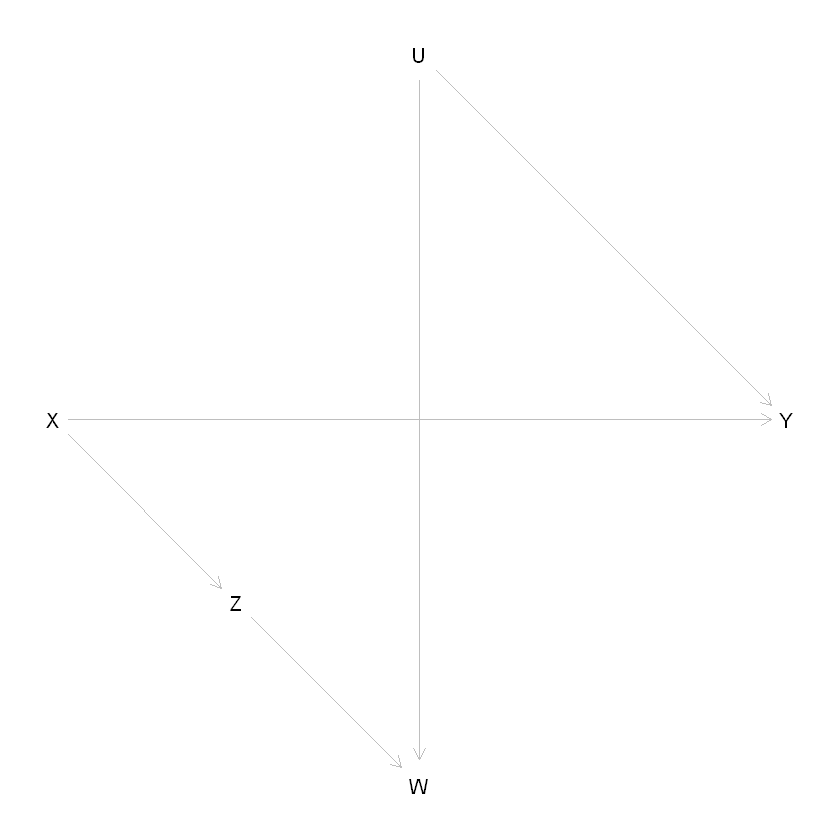

In [96]:
g <- dagitty("dag {
    X -> Z -> W <- U -> Y
    X -> Y
}")
coordinates(g) <- list(
    x=c(X=1,Z=1.5,W=2,U=2,Y=3),
    y=c(X=1,Z=1.5,W=2,U=0,Y=1) )

plot(g)

In [97]:
set.seed(1)
n <- 1000  
U <- rnorm(1000)
X <- rnorm(1000)
Z <- 2*X + rnorm(1000)
W <- 3*Z + 5*U + rnorm(1000)
Y <- X + 4*U + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z, W=W, U=U)

In [98]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
          )


                                  Dependent variable:              
                    -----------------------------------------------
                                           Y                       
                           NoControl             UsingControl      
                              (1)                     (2)          
-------------------------------------------------------------------
X                          1.035***                0.781***        
                            (0.128)                 (0.292)        
                                                                   
Z                                                    0.126         
                                                    (0.130)        
                                                                   
Constant                    -0.066                  -0.068         
                            (0.134)                 (0.134)        
                                               

In this case, controlling for Z does reduce the variation of X, and will therefore reduce precision in the estimation of the causal effect of X on Y.

### Model 16: Bad Controls (selection bias)

Contrary to Models 14 and 15, here controlling for Z is no longer harmless, and induces what is classically known as “selection bias” or “collider stratification bias.” 

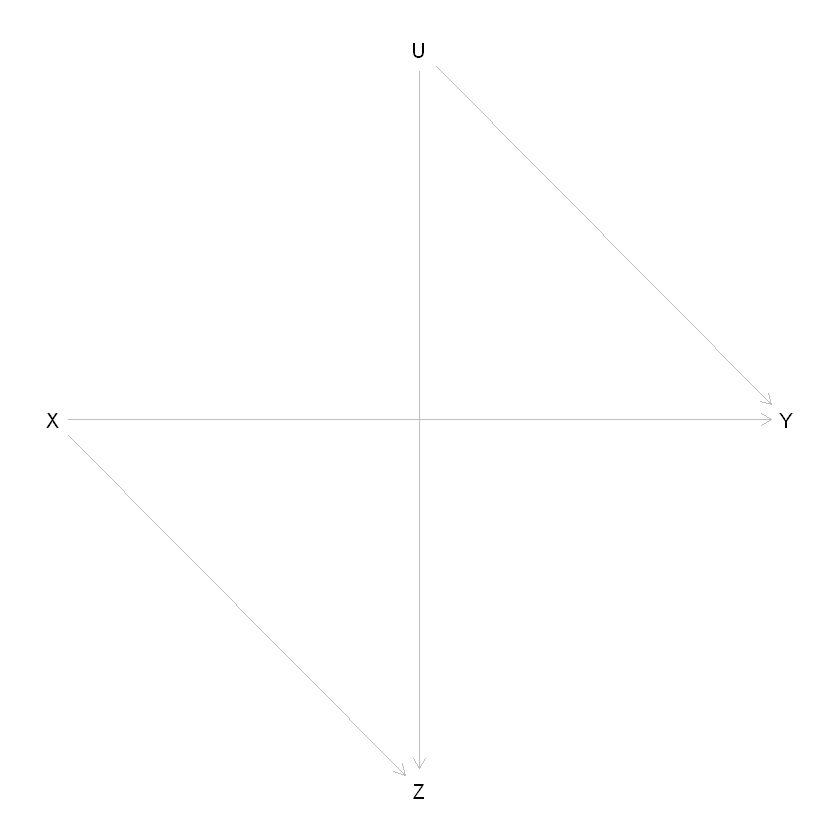

In [101]:
g <- dagitty("dag {
    X -> Z <- U -> Y
    X -> Y
}")
coordinates(g) <- list(
    x=c(X=1,U=2,Z=2,Y=3),
    y=c(X=1,U=0,Z=2,Y=1) )

plot(g)

In [102]:
set.seed(1)
n <- 1000  
U <- rnorm(1000)
X <- rnorm(1000)
Z <- 2*X + 2.5*U + rnorm(1000)
Y <- X + 4*U + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z, U=U)

In [103]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
          )


                                   Dependent variable:                
                    --------------------------------------------------
                                            Y                         
                           NoControl               UsingControl       
                              (1)                      (2)            
----------------------------------------------------------------------
X                          1.041***                 -1.753***         
                            (0.131)                  (0.070)          
                                                                      
Z                                                    1.371***         
                                                     (0.020)          
                                                                      
Constant                    -0.029                    -0.011          
                            (0.136)                  (0.058)          
     

Adjusting for Z in Model 16 opens the colliding path X → Z ← U → Y and so biases the estimation.

### Model 17:  Bad Controls (selection bias)

Here we have other case that we denominated "selection bias".

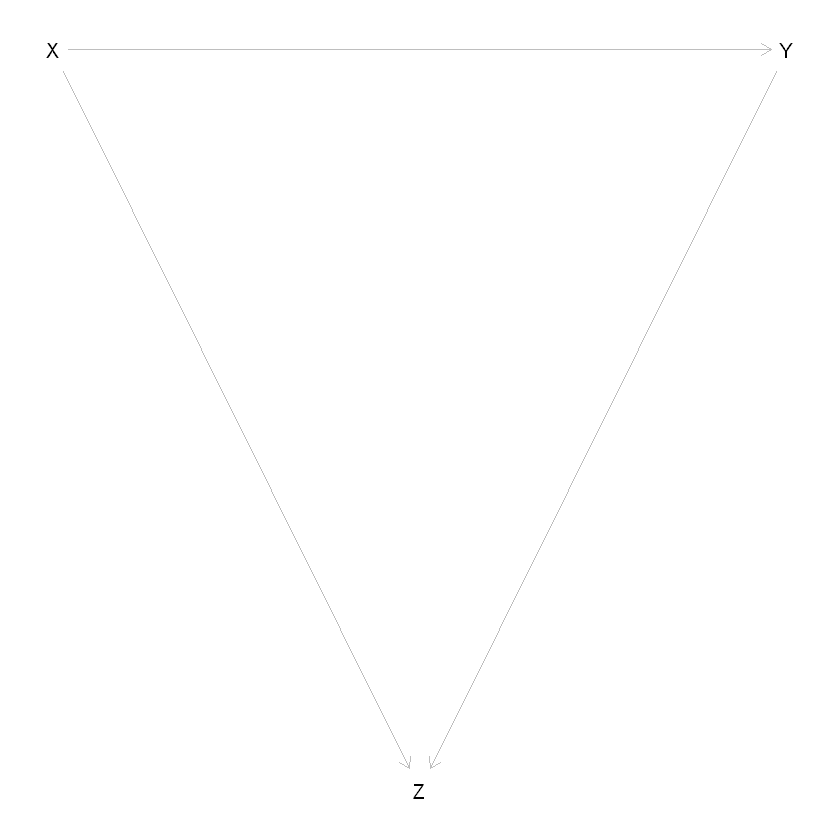

In [105]:
g <- dagitty("dag {
    Z <- X -> Y -> Z
    X -> Z
    
}")
coordinates(g) <- list(
    x=c(X=1,Z=2,Y=3),
    y=c(X=0,Y=0,Z=1) )

plot(g)

In [106]:
set.seed(1)
n <- 1000  
X <- rnorm(1000)
Y <- X + rnorm(1000)
Z <- 2*X + 2.5*Y + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z)

In [107]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
          )


                                     Dependent variable:                 
                    -----------------------------------------------------
                                              Y                          
                            NoControl                 UsingControl       
                               (1)                        (2)            
-------------------------------------------------------------------------
X                            1.006***                  -0.562***         
                             (0.032)                    (0.023)          
                                                                         
Z                                                       0.344***         
                                                        (0.004)          
                                                                         
Constant                      -0.016                     -0.008          
                             (0.033) 

### Model 18: Bad Control (case-control bias)


In our last example, Z is not in the causal pathway from X to Y , Z is not a direct cause of X, and Z is connected to Y . Thus, one might surmise that, as in Model 8, controlling for Z is harmless for identification, and perhaps beneficial for finite sample efficiency.

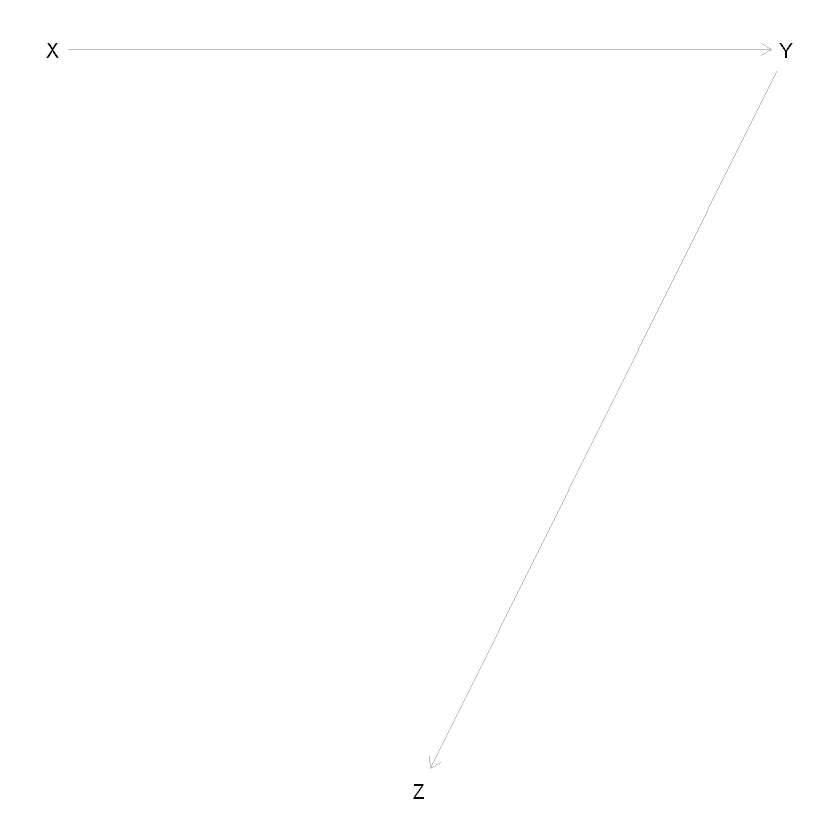

In [108]:
g <- dagitty("dag {
    X -> Y -> Z  
}")
coordinates(g) <- list(
    x=c(X=1,Z=2,Y=3),
    y=c(X=0,Y=0,Z=1) )

plot(g)

In [109]:
set.seed(1)
n <- 1000  
X <- rnorm(1000)
Y <- X + rnorm(1000)
Z <- 2.5*Y + rnorm(1000)

# Create a dataframe
d <- data.frame(X=X,Y=Y,Z=Z)

In [110]:
lm_1 <- lm(Y ~ X, d)
lm_2 <- lm(Y ~ X + Z, d)
stargazer(lm_1, lm_2, 
          type = "text", 
          column.labels = c("NoControl", "UsingControl")
          )


                                     Dependent variable:                 
                    -----------------------------------------------------
                                              Y                          
                            NoControl                 UsingControl       
                               (1)                        (2)            
-------------------------------------------------------------------------
X                            1.006***                   0.125***         
                             (0.032)                    (0.016)          
                                                                         
Z                                                       0.344***         
                                                        (0.004)          
                                                                         
Constant                      -0.016                     -0.008          
                             (0.033) 

However, controlling for the effects of the outcome Y will induce bias in the estimate of the ACE, even without the direct arrow X → Z, thus making Z a “bad control.” This happens because Z is in fact a descendant of a collider: the outcome Y itself.